In [1]:
import pandas as pd 
credit_data = pd.read_csv("credit_card.csv")

In [2]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
credit_data.rename(columns={"default payment next month": "Default"}, inplace=True)

In [4]:
credit_data.shape

(30000, 25)

In [5]:
credit_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [6]:
duplicates = credit_data[credit_data.duplicated()]
duplicates

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default


In [7]:
credit_data['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [8]:
credit_data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [9]:
credit_data['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

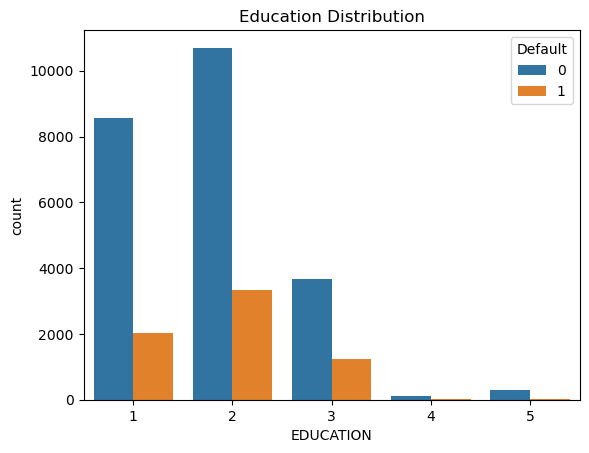

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.title('Education Distribution')
plot1 = sns.countplot(x= 'EDUCATION' , hue = 'Default',data=credit_data)
plt.show()

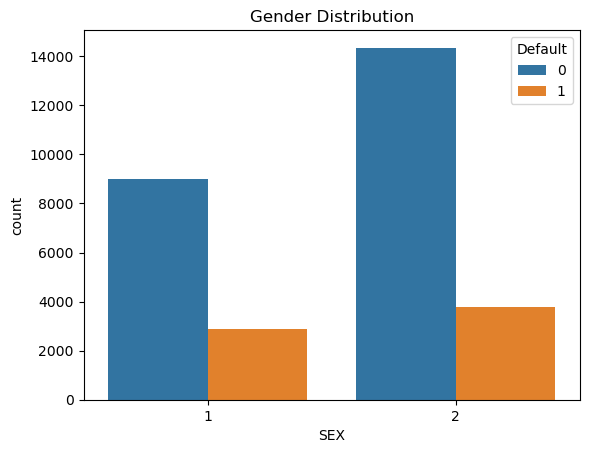

In [11]:
plt.title('Gender Distribution')
plot1 = sns.countplot(x= 'SEX' , hue = 'Default',data=credit_data)
plt.show()

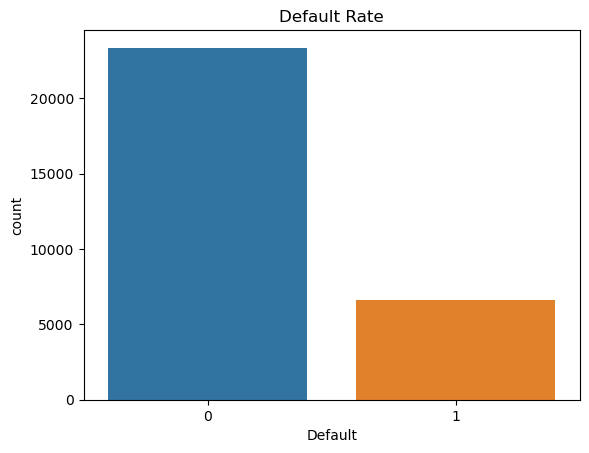

In [12]:
plt.title('Default Rate')
plot1 = sns.countplot(x= 'Default',data=credit_data)
plt.show()

In [13]:
credit_data.drop(["ID"], axis=1, inplace= True) 

<AxesSubplot:>

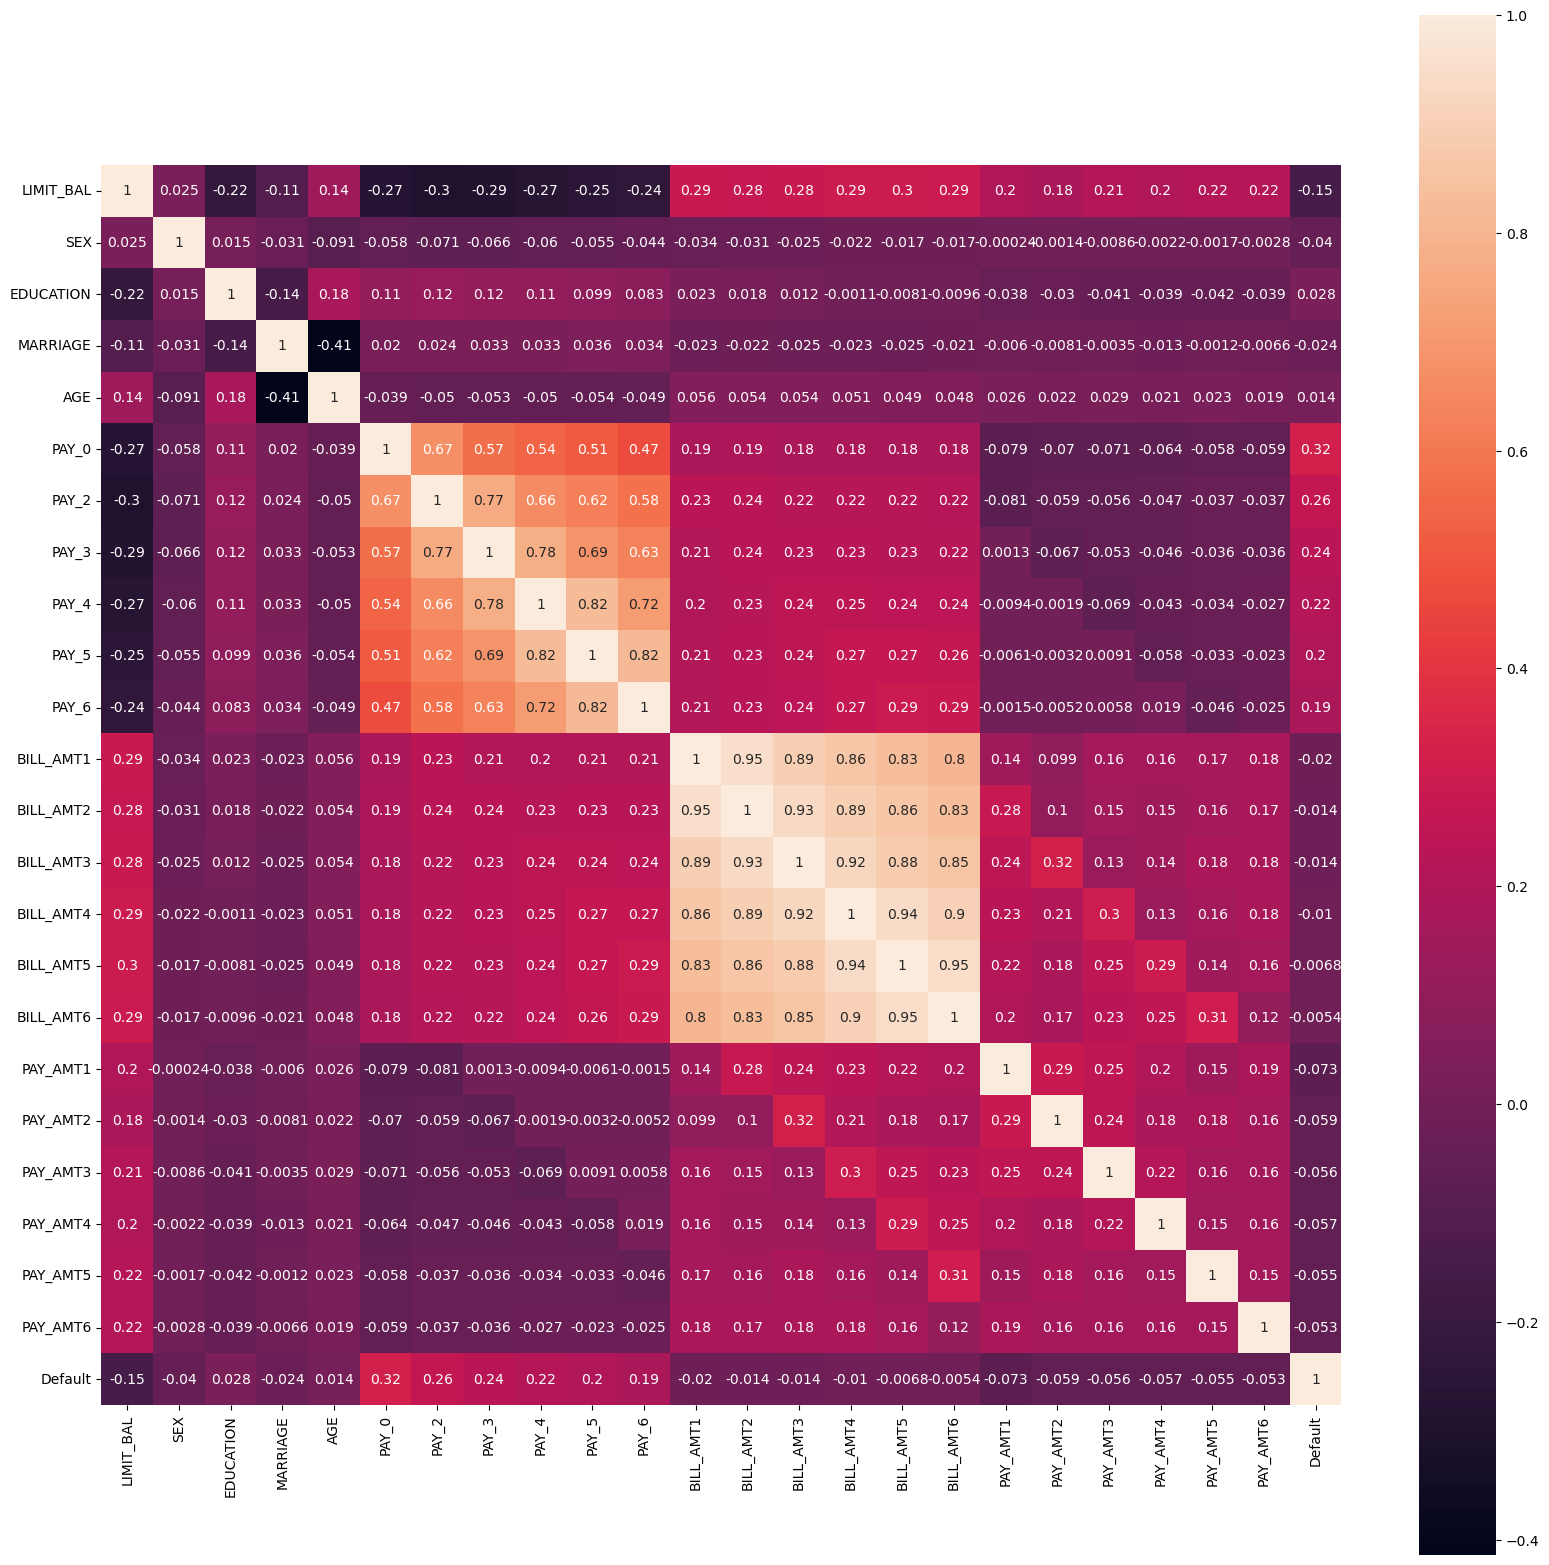

In [14]:
plt.figure(figsize = (20,20))
sns.heatmap(credit_data.corr(),annot = True,square = True)

In [15]:
X = credit_data.drop(['Default'], axis=1)

y = credit_data['Default']

In [16]:
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve


In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=100)

In [18]:
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()

X_train,y_train= SMOTE.fit_resample(X_train,y_train)

print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18739, 1: 5261})
After oversampling:  Counter({0: 18739, 1: 18739})


In [19]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 56.78%


Random Forest Accuracy is: 0.7878333333333334
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4625
           1       0.54      0.51      0.52      1375

    accuracy                           0.79      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.78      0.79      0.79      6000



C:\Users\Shivani Gangarapollu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


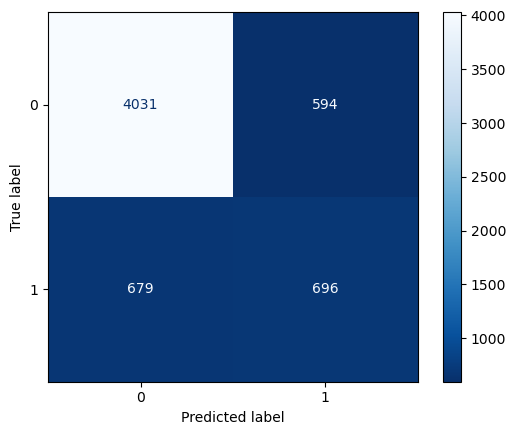

In [20]:
rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))

plot_confusion_matrix(rf, X_test, y_test, cmap="Blues_r")

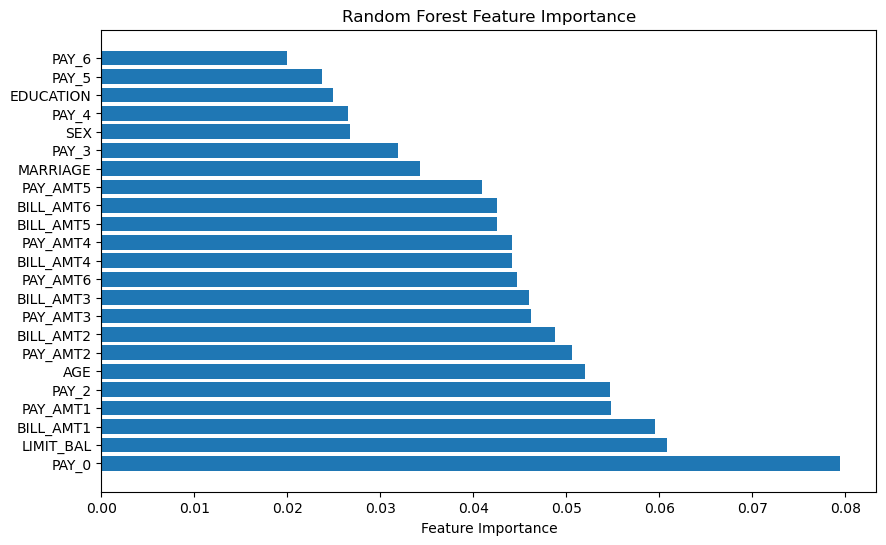

In [23]:

feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))
plot_confusion_matrix(xgboost, X_test, y_test, cmap="Blues_r")